In [1]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import SimpleRNN
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
In C:\Users\niksi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\niksi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\niksi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\niksi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\niksi\Anaconda3\lib\site-packages\matplotlib\mpl-data\

In [2]:
data = pd.read_csv('CWD09janv2.csv', error_bad_lines=False)

b'Skipping line 46: expected 8 fields, saw 16\nSkipping line 89: expected 8 fields, saw 16\nSkipping line 129: expected 8 fields, saw 16\nSkipping line 173: expected 8 fields, saw 16\nSkipping line 215: expected 8 fields, saw 16\nSkipping line 256: expected 8 fields, saw 16\nSkipping line 297: expected 8 fields, saw 16\nSkipping line 341: expected 8 fields, saw 16\nSkipping line 386: expected 8 fields, saw 16\nSkipping line 429: expected 8 fields, saw 16\nSkipping line 472: expected 8 fields, saw 16\nSkipping line 513: expected 8 fields, saw 16\nSkipping line 554: expected 8 fields, saw 16\nSkipping line 599: expected 8 fields, saw 16\nSkipping line 641: expected 8 fields, saw 16\nSkipping line 687: expected 8 fields, saw 16\nSkipping line 731: expected 8 fields, saw 16\nSkipping line 769: expected 8 fields, saw 16\nSkipping line 813: expected 8 fields, saw 16\nSkipping line 854: expected 8 fields, saw 16\nSkipping line 898: expected 8 fields, saw 16\nSkipping line 939: expected 8 fiel

In [3]:
data

,kode_kab,kab/kota,Week,Date,Confirmed,Recovered,Deaths,Active
0,3201,Kabupaten Bogor,1,14/03/20,1,0,0,1
1,3201,Kabupaten Bogor,2,21/03/20,5,0,0,5
2,3201,Kabupaten Bogor,3,28/03/20,7,1,0,6
3,3201,Kabupaten Bogor,4,04/04/20,27,1,1,25
4,3201,Kabupaten Bogor,5,11/04/20,41,2,3,36
...,...,...,...,...,...,...,...,...
1124,3279,Kota Banjar,36,12/12/20,233,166,24,43
1125,3279,Kota Banjar,37,19/12/20,251,187,24,40
1126,3279,Kota Banjar,38,26/12/20,265,206,24,35
1127,3279,Kota Banjar,39,02/01/21,326,227,24,75


In [4]:
Active=data[['kode_kab','kab/kota','Week','Active']]

In [5]:
df = Active.iloc[:,3:4].astype('float32')
df = np.reshape(df,(-1,1))

In [6]:
df2 =np.array(df[44:86])
df4 =np.array(df[125:168])
df5 =np.array(df[168:209])
df7 =np.array(df[249:289])
df8 =np.array(df[289:332])
df9 =np.array(df[332:376])
df10 =np.array(df[376:418])
df11 =np.array(df[418:460])
df13 =np.array(df[500:540])
df14 = np.array(df[540:584])
df15 = np.array(df[584:625])
df16 = np.array(df[625:670])
df17 = np.array(df[670:713])
df72 = np.array(df[793:833])
df77 = np.array(df[1005:1047])
df78 = np.array(df[1047:1089])
df79 = np.array(df[1089:1129])
df73 = np.array(df[833:876])

In [7]:
#SIGMOID
scaler2 = MinMaxScaler(feature_range=(0,1))
scaler4 = MinMaxScaler(feature_range=(0,1))
scaler5 = MinMaxScaler(feature_range=(0,1))
scaler7 = MinMaxScaler(feature_range=(0,1))
scaler8 = MinMaxScaler(feature_range=(0,1))
scaler9 = MinMaxScaler(feature_range=(0,1))
scaler10 = MinMaxScaler(feature_range=(0,1))
scaler11 = MinMaxScaler(feature_range=(0,1))
scaler13 = MinMaxScaler(feature_range=(0,1))
scaler14 = MinMaxScaler(feature_range=(0,1))
scaler15 = MinMaxScaler(feature_range=(0,1))
scaler16 = MinMaxScaler(feature_range=(0,1))
scaler17 = MinMaxScaler(feature_range=(0,1))
scaler72 = MinMaxScaler(feature_range=(0,1))
scaler77 = MinMaxScaler(feature_range=(0,1))
scaler78 = MinMaxScaler(feature_range=(0,1))
scaler79 = MinMaxScaler(feature_range=(0,1))
scaler73 = MinMaxScaler(feature_range=(0,1))

In [8]:
df2 = scaler2.fit_transform(df2)
df4 = scaler4.fit_transform(df4)
df5 = scaler5.fit_transform(df5)
df7 = scaler7.fit_transform(df7)
df8 = scaler8.fit_transform(df8)
df9 = scaler9.fit_transform(df9)
df10 = scaler10.fit_transform(df10)
df11 = scaler11.fit_transform(df11)
df13 = scaler13.fit_transform(df13)
df14 = scaler14.fit_transform(df14)
df15 = scaler15.fit_transform(df15)
df16 = scaler16.fit_transform(df16)
df17 = scaler17.fit_transform(df17)
df72 = scaler72.fit_transform(df72)
df77 = scaler77.fit_transform(df77)
df78 = scaler78.fit_transform(df78)
df79 = scaler79.fit_transform(df79)

In [9]:
#TRAINING TESTING KOTA BANDUNG 80%
train_size=int(len(df73)*0.80)
test_size=len(df73)-train_size
train_size,test_size

(34, 9)

In [10]:
#80%
ts_train, ts_test = train_test_split(df73, test_size=0.2, shuffle=False)

In [11]:
train,test = df73[0:train_size,:],df73[train_size:len(df73),:]
train,test

(array([[  2.],
        [  5.],
        [ 35.],
        [ 55.],
        [ 92.],
        [125.],
        [181.],
        [177.],
        [184.],
        [168.],
        [158.],
        [141.],
        [138.],
        [113.],
        [109.],
        [ 99.],
        [ 55.],
        [ 31.],
        [ 37.],
        [ 31.],
        [ 49.],
        [ 64.],
        [ 69.],
        [ 82.],
        [ 90.],
        [190.],
        [193.],
        [139.],
        [158.],
        [241.],
        [171.],
        [248.],
        [228.],
        [202.]], dtype=float32),
 array([[266.],
        [339.],
        [592.],
        [707.],
        [884.],
        [654.],
        [620.],
        [582.],
        [657.]], dtype=float32))

In [12]:
df73_train = scaler73.fit_transform(train)
df73_test = scaler73.transform(test)

In [13]:
def create_df(df,look_back):
    X,y=[],[]
    for i in range (len(df)-look_back):
        a=df[i:(i+look_back),0]
        X.append(a)
        y.append(df[i+look_back,0])
    return np.array(X),np.array(y)

In [14]:
look_back=4

In [15]:
df73_train,df73_test

(array([[0.        ],
        [0.01219512],
        [0.13414633],
        [0.21544716],
        [0.36585367],
        [0.5       ],
        [0.72764224],
        [0.7113821 ],
        [0.7398374 ],
        [0.6747967 ],
        [0.63414633],
        [0.56504065],
        [0.55284554],
        [0.4512195 ],
        [0.43495935],
        [0.39430892],
        [0.21544716],
        [0.11788618],
        [0.1422764 ],
        [0.11788618],
        [0.1910569 ],
        [0.25203252],
        [0.27235773],
        [0.32520324],
        [0.35772356],
        [0.7642276 ],
        [0.77642274],
        [0.5569106 ],
        [0.63414633],
        [0.9715447 ],
        [0.6869919 ],
        [1.        ],
        [0.91869915],
        [0.8130081 ]], dtype=float32),
 array([[1.0731707],
        [1.3699187],
        [2.3983738],
        [2.8658535],
        [3.5853658],
        [2.6504064],
        [2.512195 ],
        [2.3577235],
        [2.6626015]], dtype=float32))

In [16]:
X2, y2=create_df(df2,look_back)
X4, y4=create_df(df4,look_back)
X5, y5=create_df(df5,look_back)
X7, y7=create_df(df7,look_back)
X8, y8=create_df(df8,look_back)
X9, y9=create_df(df9,look_back)
X10, y10=create_df(df10,look_back)
X11, y11=create_df(df11,look_back)
X13, y13=create_df(df13,look_back)
X14, y14=create_df(df14,look_back)
X15, y15=create_df(df15,look_back)
X16, y16=create_df(df16,look_back)
X17, y17=create_df(df17,look_back)
X72, y72=create_df(df72,look_back)
X77, y77=create_df(df77,look_back)
X78, y78=create_df(df78,look_back)
X79, y79=create_df(df79,look_back)


#Kota Bandung
X73_train, Y73_train=create_df(df73_train,look_back)
X73_test, Y73_test=create_df(df73_test,look_back)

In [17]:
X73_test, Y73_test

(array([[1.0731707, 1.3699187, 2.3983738, 2.8658535],
        [1.3699187, 2.3983738, 2.8658535, 3.5853658],
        [2.3983738, 2.8658535, 3.5853658, 2.6504064],
        [2.8658535, 3.5853658, 2.6504064, 2.512195 ],
        [3.5853658, 2.6504064, 2.512195 , 2.3577235]], dtype=float32),
 array([3.5853658, 2.6504064, 2.512195 , 2.3577235, 2.6626015],
       dtype=float32))

In [18]:
##reshape input to be [samples, time steps, features]
X2=np.reshape(X2,(X2.shape[0],X2.shape[1],1))
X4=np.reshape(X4,(X4.shape[0],X4.shape[1],1))
X5=np.reshape(X5,(X5.shape[0],X5.shape[1],1))
X7=np.reshape(X7,(X7.shape[0],X7.shape[1],1))
X8=np.reshape(X8,(X8.shape[0],X8.shape[1],1))
X9=np.reshape(X9,(X9.shape[0],X9.shape[1],1))
X10=np.reshape(X10,(X10.shape[0],X10.shape[1],1))
X11=np.reshape(X11,(X11.shape[0],X11.shape[1],1))
X13=np.reshape(X13,(X13.shape[0],X13.shape[1],1))
X14=np.reshape(X14,(X14.shape[0],X14.shape[1],1))
X15=np.reshape(X15,(X15.shape[0],X15.shape[1],1))
X16=np.reshape(X16,(X16.shape[0],X16.shape[1],1))
X17=np.reshape(X17,(X17.shape[0],X17.shape[1],1))
X72=np.reshape(X72,(X72.shape[0],X72.shape[1],1))
X77=np.reshape(X77,(X77.shape[0],X77.shape[1],1))
X78=np.reshape(X78,(X78.shape[0],X78.shape[1],1))
X79=np.reshape(X79,(X79.shape[0],X79.shape[1],1))


#KOTA BANDUNG
X73_train=np.reshape(X73_train,(X73_train.shape[0],X73_train.shape[1],1))
X73_test=np.reshape(X73_test,(X73_test.shape[0],X73_test.shape[1],1))

In [19]:
X73_train.shape

(30, 4, 1)

In [20]:
# define model without dense (output) activation layer (with dropout)
model = Sequential()
model.add(LSTM(10, input_shape=(4, 1)))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
# TRIAL
# fit model
model.fit(X2, y2, epochs=15, verbose=0, shuffle = False)
model.fit(X4, y4, epochs=15, verbose=0, shuffle = False)
model.fit(X5, y5, epochs=15, verbose=0, shuffle = False)
model.fit(X7, y7, epochs=15, verbose=0, shuffle = False)
model.fit(X8, y8, epochs=15, verbose=0, shuffle = False)
model.fit(X9, y9, epochs=15, verbose=0, shuffle = False)
model.fit(X10, y10, epochs=15, verbose=0, shuffle = False)
model.fit(X11, y11, epochs=15, verbose=0, shuffle = False)
model.fit(X13, y13, epochs=15, verbose=0, shuffle = False)
model.fit(X14, y14, epochs=15, verbose=0, shuffle = False)
model.fit(X15, y15, epochs=15, verbose=0, shuffle = False)
model.fit(X16, y16, epochs=15, verbose=0, shuffle = False)
model.fit(X17, y17, epochs=15, verbose=0, shuffle = False)
model.fit(X72, y72, epochs=15, verbose=0, shuffle = False)
model.fit(X77, y77, epochs=15, verbose=0, shuffle = False)
model.fit(X78, y78, epochs=15, verbose=0, shuffle = False)
model.fit(X79, y79, epochs=15, verbose=0, shuffle = False)

In [22]:
#early stop
history = model.fit(X73_train, Y73_train, epochs=250, batch_size=1 ,validation_data=(X73_test,Y73_test),
                    callbacks=[EarlyStopping(monitor='val_loss',patience=10)],verbose=1,shuffle=False)

Train on 30 samples, validate on 5 samples
Epoch 1/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0395 - val_loss: 2.1035
Epoch 2/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 1.9548
Epoch 3/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 1.9407
Epoch 4/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 1.9079
Epoch 5/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0374 - val_loss: 1.8735
Epoch 6/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 1.8414
Epoch 7/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0366 - val_loss: 1.8101
Epoch 8/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0363 - val_loss: 1.7796
Epoch 9/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0359 - val_loss: 1.7497
Epoch 10/250
30/30 [==============================] - 0s 4ms/step 

In [23]:
train_predict=model.predict(X73_train)
test_predict=model.predict(X73_test)
#invert prediction
train_predict=scaler73.inverse_transform(train_predict)
Y_train=scaler73.inverse_transform([Y73_train])
test_predict=scaler73.inverse_transform(test_predict)
Y_test=scaler73.inverse_transform([Y73_test])
print('Train Mean Absolute Error:',
      mean_absolute_error(Y_train[0],train_predict[:,0]))
print('Train Root Mean Squared Error:',
      np.sqrt(mean_squared_error(Y_train[0],train_predict[:,0])))
print('Test Mean Absolute Error:',
      mean_absolute_error(Y_test[0],test_predict[:,0]))
print('Test Root Mean Squared Error:',
      np.sqrt(mean_squared_error(Y_test[0],test_predict[:,0])))

Train Mean Absolute Error: 20.472811172157517
Train Root Mean Squared Error: 32.17547882024706
Test Mean Absolute Error: 95.76071649044745
Test Root Mean Squared Error: 146.11748667992302


In [24]:
test_predict, Y_test

(array([[569.3484 ],
        [681.3828 ],
        [647.11926],
        [625.664  ],
        [591.0141 ]], dtype=float32),
 array([[884.00001283, 653.999989  , 620.00002016, 581.99999633,
         656.99998625]]))

In [25]:
train_predict, Y_train

(array([[ 90.96129 ],
        [121.37136 ],
        [144.75694 ],
        [184.02924 ],
        [183.35246 ],
        [180.43587 ],
        [164.52979 ],
        [154.10562 ],
        [137.37146 ],
        [130.11504 ],
        [112.66769 ],
        [103.6611  ],
        [ 94.76779 ],
        [ 65.51783 ],
        [ 35.049374],
        [ 37.651512],
        [ 52.22548 ],
        [ 71.81934 ],
        [ 86.744545],
        [ 94.24165 ],
        [ 97.906204],
        [102.18564 ],
        [178.14934 ],
        [201.72084 ],
        [165.08122 ],
        [143.86603 ],
        [194.95532 ],
        [190.3306  ],
        [218.4962  ],
        [216.89896 ]], dtype=float32),
 array([[ 92.0000055 , 125.00000458, 180.99999725, 177.00000092,
         184.00000916, 167.9999945 , 158.00000367, 141.00000458,
         138.00000733, 113.00000092, 109.00000458,  98.99999908,
          55.00000275,  31.00000092,  36.99999725,  31.00000092,
          49.00000092,  64.00000183,  69.00000458,  82.        

In [26]:
def mean_absolute_percentage_error (Y_test,test_predict) :
    Y_test, test_predict=np.array(Y_test),np.array(test_predict)
    return np.mean(np.abs((Y_test-test_predict)/Y_test))*100
mean_absolute_percentage_error (Y_test,test_predict)

11.228653881937884

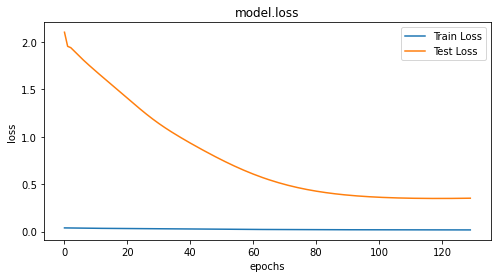

In [27]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Test Loss')
plt.title('model.loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

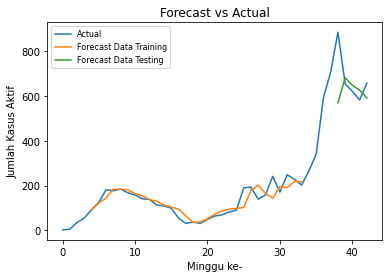

In [28]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df73)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df73)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train)+look_back:len(df73), :] = test_predict

# plot baseline and predictions
plt.plot(df73, label='Actual')
plt.plot(trainPredictPlot, label='Forecast Data Training')
plt.plot(testPredictPlot, label='Forecast Data Testing')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Minggu ke-')
plt.ylabel('Jumlah Kasus Aktif')
plt.title('Forecast vs Actual')
plt.show()

In [29]:
#Predict Future
data = pd.read_csv('CWD09janv2.csv',error_bad_lines=False)

b'Skipping line 46: expected 8 fields, saw 16\nSkipping line 89: expected 8 fields, saw 16\nSkipping line 129: expected 8 fields, saw 16\nSkipping line 173: expected 8 fields, saw 16\nSkipping line 215: expected 8 fields, saw 16\nSkipping line 256: expected 8 fields, saw 16\nSkipping line 297: expected 8 fields, saw 16\nSkipping line 341: expected 8 fields, saw 16\nSkipping line 386: expected 8 fields, saw 16\nSkipping line 429: expected 8 fields, saw 16\nSkipping line 472: expected 8 fields, saw 16\nSkipping line 513: expected 8 fields, saw 16\nSkipping line 554: expected 8 fields, saw 16\nSkipping line 599: expected 8 fields, saw 16\nSkipping line 641: expected 8 fields, saw 16\nSkipping line 687: expected 8 fields, saw 16\nSkipping line 731: expected 8 fields, saw 16\nSkipping line 769: expected 8 fields, saw 16\nSkipping line 813: expected 8 fields, saw 16\nSkipping line 854: expected 8 fields, saw 16\nSkipping line 898: expected 8 fields, saw 16\nSkipping line 939: expected 8 fiel

In [30]:
data = data[['Date','Active']]

In [31]:
data = data[833:876].reset_index(drop=True) #Kota Bandung

In [32]:
data

,Date,Active
0,21/03/20,2
1,28/03/20,5
2,04/04/20,35
3,11/04/20,55
4,18/04/20,92
5,25/04/20,125
6,02/05/20,181
7,09/05/20,177
8,16/05/20,184
9,23/05/20,168


In [33]:
data['Date'] = pd.to_datetime(data['Date']) 

In [34]:
# 80% training
close_data = data['Active'].values 
close_data = close_data.reshape((-1,1)) 
split = int(len(close_data)*0.80)
close_test = close_data[split:]
train_size=int(len(df73)*0.80) 
test_size=len(df73)-train_size 
train,test=df73[0:train_size,:],df73[train_size:len(df73),:]

In [35]:
look_back = 4
test_generator = TimeseriesGenerator(close_test,close_test,length=look_back,batch_size=1)
prediction = model.predict_generator(test_generator)
close_test = close_test.reshape((-1)) 
prediction = prediction.reshape((-1)) 
close_data = close_data.reshape((-1)) 

In [36]:
close_data

array([  2,   5,  35,  55,  92, 125, 181, 177, 184, 168, 158, 141, 138,
       113, 109,  99,  55,  31,  37,  31,  49,  64,  69,  82,  90, 190,
       193, 139, 158, 241, 171, 248, 228, 202, 266, 339, 592, 707, 884,
       654, 620, 582, 657], dtype=int64)

In [37]:
def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    result = []
    for _ in range(num_prediction):
        x = prediction_list[- look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
        prediction_list = prediction_list[look_back-1:]
        result.append(prediction_list[-1])
    return result

In [38]:
def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

In [39]:
num_prediction = 1
forecast = predict(num_prediction, model)
forecast

[3.9758758544921875]

In [40]:
inversed=scaler73.inverse_transform([forecast])
print(inversed)

[[980.06549664]]
